# Getting The Data and Splitting it into Training and Testing

In [40]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train = datasets.MNIST("",train=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,transform=transforms.Compose([transforms.ToTensor()]))

trainset = DataLoader(dataset=train,batch_size=10,shuffle=True)
testset = DataLoader(dataset=test,batch_size=10,shuffle=True)

In [41]:
for data in trainset:
    # print(data[0][0].shape)
    print(data[0][0].shape)
    break
# Here We can see Each number is 28*28 pixel thats why we took input of 28*28 in Net. 
# We will Flat that to single row so that it can be understood by Network. 
# data[0][0].view(1,28*28) will be used to flatten it.

torch.Size([1, 28, 28])


# Building the Model

In [42]:
import torch.nn as nn
import torch.nn.functional as F


In [43]:
class Net(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.fc1 = nn.Linear(28*28,64) #fully connected(fc) , nn.Linear(input,output) -->we can choose any number in output, that will be in number of neorons in hidden Layer
        self.fc2 = nn.Linear(64,64) # output from the first layer must be input to second
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10) # Here there is 10 class Classification thats why we have taken 10 as output

    def forward(self,x):

        # Relu -- Rectified Linear Function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        # print(x.shape)
        # Why we are not using Relu in last layer?
        # Because Relu is used to find the probability of the class.
        # In last layer we have to find the probability distribution of the class.
        # Softmax is used to find the probability distribution of the class.

        return F.log_softmax(x,dim=1)
net = Net()
print(net) 

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [49]:
X = torch.rand((28,28))
X = X.view(-1,28*28) # Flattening the input, -1 means we dont know how many rows are there but we know there are 28*28 columns
output = net(X)
output

tensor([[ -1.9254,  -7.7952,  -5.4875,  -7.6779,  -6.9179,  -0.4405,  -1.5912,
          -7.2881, -10.0698,  -9.5410]], grad_fn=<LogSoftmaxBackward0>)

In [45]:
data[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

# Training The Model

In [56]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001) # lr is learning rate, net.parameters() is all the parameters that can be optimized

EPOCHS = 3 # How many times we want to go through the data

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X,y = data # X is the featuresets and y is the labels
        # print(X[0])
        # print(y[0])
        # break
        # Everytime we have to set the gradient to zero before we pass the data through the network
        net.zero_grad()
        X = X.view(-1,28*28)
        output = net(X)
        loss = F.nll_loss(output, y)
        # loss = F.cross_entropy(output,y) # This is same as above line
        # Two ways to calculate loss
        # 1. F.nll_loss(output, y) --> Negative Log Likelihood Loss
        # 2. F.cross_entropy(output,y) --> Cross Entropy Loss
        # One hot vector is used in Cross Entropy Loss --> One hot vector is a vector with all zeros and one 1
        # Index of the class is used in Negative Log Likelihood Loss

        # Difference between F.nll_loss and F.cross_entropy
        # F.nll_loss is used when we have only index of the class
        # F.cross_entropy is used when we have one hot vector of the class

        loss.backward() # Backpropagation
        optimizer.step() # Adjust the weights
    print(loss)

tensor(0.7743, grad_fn=<NllLossBackward0>)
tensor(0.0320, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)


In [60]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output =net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1

print(f"Accuracy : {round(correct/total,3)}")

Accuracy : 0.986


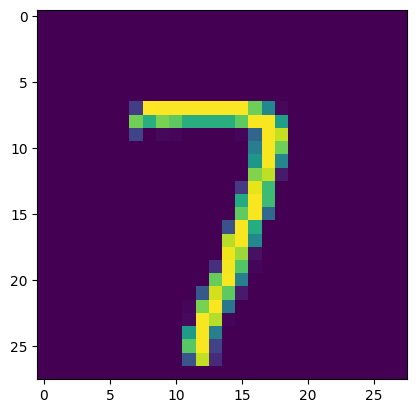

In [74]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))

In [88]:
print(torch.argmax(net(X[1].view(-1,28*28))))
# ArgMax is used to find the index of the maximum value in the tensor


tensor(7)
